In [3]:
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import json
import shutil

from PIL import Image

In [1]:
datapath = '../data/'
valpath = datapath + 'val_pics/'
annotations = datapath + 'annotations/'


imgs = []

with open(annotations + 'filename_label.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        imgs.append(valpath + row[0])
        print(valpath + row[0])

imgs = imgs[1:]

NameError: name 'csv' is not defined

In [3]:
Timgs = imgs[:30]

print(len(Timgs))

30


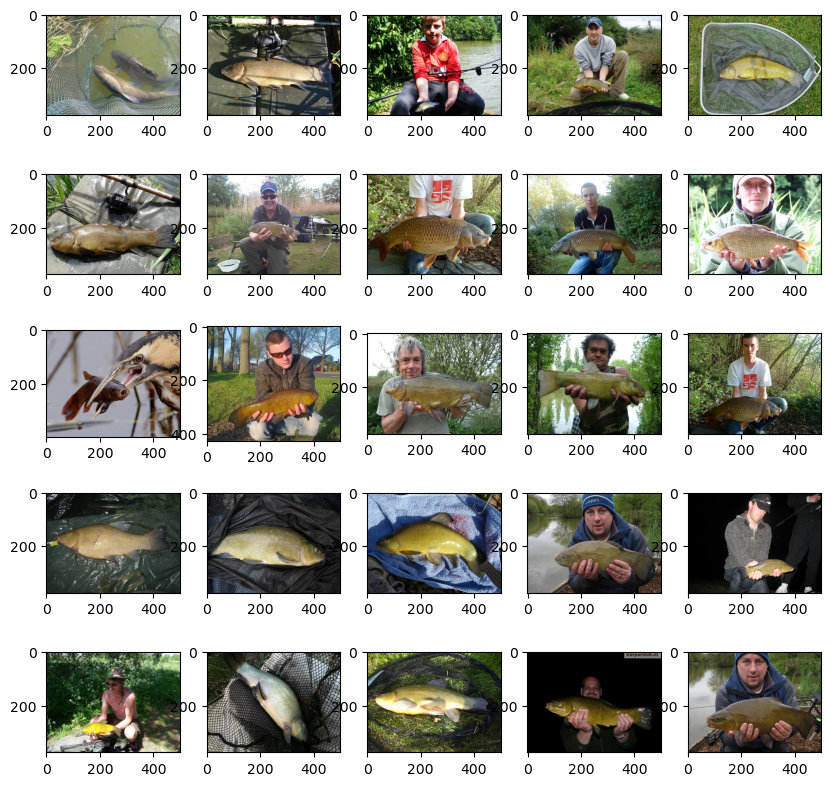

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    im = Image.open(Timgs[i])
    plt.imshow(im)

plt.show()

In [5]:
dfF = pd.read_csv(annotations + 'filename_label.csv')
dfL = pd.read_csv(annotations + 'imagenet_labels.txt', header=None)
LoL = dfL[1].to_numpy()
dfF['str_label'] = dfF['label'].apply(lambda x : LoL[x])
dfF

,file_name,label,str_label
0,ILSVRC2012_val_00000293.JPEG,0,tench
1,ILSVRC2012_val_00002138.JPEG,0,tench
2,ILSVRC2012_val_00003014.JPEG,0,tench
3,ILSVRC2012_val_00006697.JPEG,0,tench
4,ILSVRC2012_val_00007197.JPEG,0,tench
...,...,...,...
49995,ILSVRC2012_val_00044368.JPEG,999,toilet tissue
49996,ILSVRC2012_val_00045266.JPEG,999,toilet tissue
49997,ILSVRC2012_val_00046353.JPEG,999,toilet tissue
49998,ILSVRC2012_val_00047144.JPEG,999,toilet tissue


In [6]:
dfF[dfF['str_label']=='musteline_mammal']

,file_name,label,str_label


In [7]:
dfJson = pd.read_json(annotations+'imagenet_x_val_multi_factor.jsonl', lines=True)
dfJson

,file_name,class,multiple_objects,background,color,brighter,darker,style,larger,smaller,object_blocking,person_blocking,partial_view,pattern,pose,shape,subcategory,texture,justification,one_word
0,ILSVRC2012_val_00004487.JPEG,762,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,close up of a pan fried sea bass.,sea bass close up
1,ILSVRC2012_val_00003963.JPEG,292,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,sepia image of tiger,digitally altered
2,ILSVRC2012_val_00041992.JPEG,718,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,the bridge is brown,rare view
3,ILSVRC2012_val_00028056.JPEG,635,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,the magnetic compass is on the bronze container,wood shape
4,ILSVRC2012_val_00016832.JPEG,497,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,A dark image of a church.,dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48863,ILSVRC2012_val_00004973.JPEG,973,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,color is different,color
48864,ILSVRC2012_val_00038750.JPEG,765,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,front view image of rocking chair made by digi...,window digital art
48865,ILSVRC2012_val_00043497.JPEG,409,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,right angle of analog clock with gold metallic...,right angle
48866,ILSVRC2012_val_00005859.JPEG,441,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,A different design of a beer glass.,pattern background


In [8]:
dfFinal = dfJson.merge(dfF, how='inner', on='file_name').drop(columns=['class'])

In [20]:
dfFinal.to_csv('val_imgs_df.csv', index=False)

In [9]:
df1 = pd.read_csv('val_imgs_df.csv')

In [22]:
df1

,file_name,multiple_objects,background,color,brighter,darker,style,larger,smaller,object_blocking,...,partial_view,pattern,pose,shape,subcategory,texture,justification,one_word,label,str_label
0,ILSVRC2012_val_00004487.JPEG,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,close up of a pan fried sea bass.,sea bass close up,762,restaurant
1,ILSVRC2012_val_00003963.JPEG,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,sepia image of tiger,digitally altered,292,tiger
2,ILSVRC2012_val_00041992.JPEG,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,the bridge is brown,rare view,718,pier
3,ILSVRC2012_val_00028056.JPEG,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,the magnetic compass is on the bronze container,wood shape,635,magnetic compass
4,ILSVRC2012_val_00016832.JPEG,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,A dark image of a church.,dark,497,church
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48863,ILSVRC2012_val_00004973.JPEG,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,color is different,color,973,coral reef
48864,ILSVRC2012_val_00038750.JPEG,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,front view image of rocking chair made by digi...,window digital art,765,rocking chair
48865,ILSVRC2012_val_00043497.JPEG,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,right angle of analog clock with gold metallic...,right angle,409,analog clock
48866,ILSVRC2012_val_00005859.JPEG,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,A different design of a beer glass.,pattern background,441,beer glass


In [23]:
dfSample = df1.sample(30, random_state=42)

In [24]:
dfSample.to_csv('df_30img_samples.csv', index=False)
dfSample

,file_name,multiple_objects,background,color,brighter,darker,style,larger,smaller,object_blocking,...,partial_view,pattern,pose,shape,subcategory,texture,justification,one_word,label,str_label
32258,ILSVRC2012_val_00049472.JPEG,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,side view image of cheeseburger,white background,933,cheeseburger
41698,ILSVRC2012_val_00003768.JPEG,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,Another type green snake hanging on a tree bra...,hanging tree brunch,55,green snake
48172,ILSVRC2012_val_00041473.JPEG,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,front view image of Welsh Springer Spaniel sta...,cropped,218,Welsh springer spaniel
13867,ILSVRC2012_val_00001470.JPEG,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,a strainer of a sink,sink,828,strainer
28143,ILSVRC2012_val_00049179.JPEG,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,the packet is on the fabric,bird,692,packet
41146,ILSVRC2012_val_00023283.JPEG,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,a puppy lying down on the pale green lawn with...,puppy flower,174,Norwegian elkhound
35018,ILSVRC2012_val_00030540.JPEG,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,a dog running on the grass,running,216,clumber
36065,ILSVRC2012_val_00039246.JPEG,0,1,0,0,1,0,0,1,0,...,0,1,1,0,0,0,zoomed out image of television,zoomed out,851,television
18821,ILSVRC2012_val_00015178.JPEG,0,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,A front view of torch,front view large,862,torch
30231,ILSVRC2012_val_00023750.JPEG,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,front view image of a dog,snow,244,Tibetan mastiff


In [25]:
l = dfSample.file_name.to_numpy()

In [26]:
l

array(['ILSVRC2012_val_00049472.JPEG', 'ILSVRC2012_val_00003768.JPEG',
       'ILSVRC2012_val_00041473.JPEG', 'ILSVRC2012_val_00001470.JPEG',
       'ILSVRC2012_val_00049179.JPEG', 'ILSVRC2012_val_00023283.JPEG',
       'ILSVRC2012_val_00030540.JPEG', 'ILSVRC2012_val_00039246.JPEG',
       'ILSVRC2012_val_00015178.JPEG', 'ILSVRC2012_val_00023750.JPEG',
       'ILSVRC2012_val_00007306.JPEG', 'ILSVRC2012_val_00014415.JPEG',
       'ILSVRC2012_val_00026219.JPEG', 'ILSVRC2012_val_00009634.JPEG',
       'ILSVRC2012_val_00036975.JPEG', 'ILSVRC2012_val_00040913.JPEG',
       'ILSVRC2012_val_00015410.JPEG', 'ILSVRC2012_val_00040676.JPEG',
       'ILSVRC2012_val_00040002.JPEG', 'ILSVRC2012_val_00046002.JPEG',
       'ILSVRC2012_val_00041922.JPEG', 'ILSVRC2012_val_00021882.JPEG',
       'ILSVRC2012_val_00030117.JPEG', 'ILSVRC2012_val_00021683.JPEG',
       'ILSVRC2012_val_00030263.JPEG', 'ILSVRC2012_val_00018867.JPEG',
       'ILSVRC2012_val_00003808.JPEG', 'ILSVRC2012_val_00010411.JPEG',
      

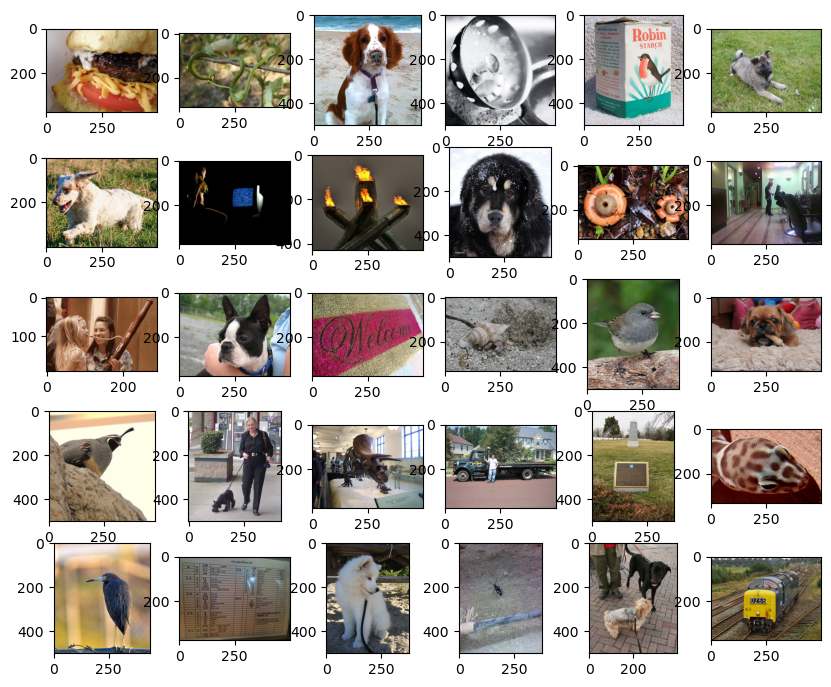

In [27]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    im = Image.open(valpath+l[i])
    plt.imshow(im)

plt.show()

In [10]:
protoDF = pd.read_csv(annotations+'prototypical_paths.csv')

protoDF = protoDF.merge(dfF, how='inner', on='file_name')

protoDF['proto_file_name'] = protoDF['file_name']

protoDF = protoDF.drop(columns=['file_name'])

In [29]:
protoDF

,label,str_label,proto_file_name
0,0,tench,ILSVRC2012_val_00007197.JPEG
1,0,tench,ILSVRC2012_val_00026397.JPEG
2,0,tench,ILSVRC2012_val_00024327.JPEG
3,1,goldfish,ILSVRC2012_val_00000307.JPEG
4,1,goldfish,ILSVRC2012_val_00020785.JPEG
...,...,...,...
2995,998,ear,ILSVRC2012_val_00045809.JPEG
2996,998,ear,ILSVRC2012_val_00049555.JPEG
2997,999,toilet tissue,ILSVRC2012_val_00036056.JPEG
2998,999,toilet tissue,ILSVRC2012_val_00038905.JPEG


In [30]:
dfSample[['label', 'file_name']]

,label,file_name
32258,933,ILSVRC2012_val_00049472.JPEG
41698,55,ILSVRC2012_val_00003768.JPEG
48172,218,ILSVRC2012_val_00041473.JPEG
13867,828,ILSVRC2012_val_00001470.JPEG
28143,692,ILSVRC2012_val_00049179.JPEG
41146,174,ILSVRC2012_val_00023283.JPEG
35018,216,ILSVRC2012_val_00030540.JPEG
36065,851,ILSVRC2012_val_00039246.JPEG
18821,862,ILSVRC2012_val_00015178.JPEG
30231,244,ILSVRC2012_val_00023750.JPEG


In [11]:
dfProtos = dfSample[['label', 'file_name']].merge(protoDF, how='inner', on = 'label')

NameError: name 'dfSample' is not defined

In [32]:
dfProtos.to_csv('imgs_for_app.csv', index=False)

In [33]:
l_example = dfProtos.proto_file_name.to_numpy()

In [34]:
l_anno = dfSample.file_name.to_numpy()

In [35]:
for f in l_anno:
    shutil.copy(valpath+f, '../App/Images/anno_imgs/'+f)

In [36]:
for f in l_example:
    shutil.copy(valpath+f, '../App/Images/example_imgs/'+f)

### Carls shit


In [12]:
df1 = pd.read_csv('val_imgs_df.csv')
df1.head()

,file_name,multiple_objects,background,color,brighter,darker,style,larger,smaller,object_blocking,...,partial_view,pattern,pose,shape,subcategory,texture,justification,one_word,label,str_label
0,ILSVRC2012_val_00004487.JPEG,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,close up of a pan fried sea bass.,sea bass close up,762,restaurant
1,ILSVRC2012_val_00003963.JPEG,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,sepia image of tiger,digitally altered,292,tiger
2,ILSVRC2012_val_00041992.JPEG,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,the bridge is brown,rare view,718,pier
3,ILSVRC2012_val_00028056.JPEG,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,the magnetic compass is on the bronze container,wood shape,635,magnetic compass
4,ILSVRC2012_val_00016832.JPEG,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,A dark image of a church.,dark,497,church


In [13]:
df1['SUM'] = df1.iloc[:,1:17].sum(axis=1)

In [21]:
valpath = '../data/val_pics/'
introExamples = []
for mistake in df1.iloc[:,1:17].columns:
    instances = df1[(df1[mistake] == 1) & (df1['SUM'] == 1)].head()
    image4intro = instances['file_name'].to_list()[0]
    print(image4intro)
    introExamples.append(image4intro)
    plt.figure(figsize=(2,2))
    im = Image.open(valpath+image4intro)
    #plt.imshow(im)

    #plt.show()

ILSVRC2012_val_00004976.JPEG
ILSVRC2012_val_00002960.JPEG
ILSVRC2012_val_00015884.JPEG
ILSVRC2012_val_00008094.JPEG
ILSVRC2012_val_00014016.JPEG
ILSVRC2012_val_00034749.JPEG
ILSVRC2012_val_00003568.JPEG
ILSVRC2012_val_00025841.JPEG
ILSVRC2012_val_00038422.JPEG
ILSVRC2012_val_00001991.JPEG
ILSVRC2012_val_00017361.JPEG
ILSVRC2012_val_00044680.JPEG
ILSVRC2012_val_00021962.JPEG
ILSVRC2012_val_00039107.JPEG
ILSVRC2012_val_00033838.JPEG
ILSVRC2012_val_00005066.JPEG


<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [15]:
examples4intro = df1[df1['file_name'].isin(introExamples)]

In [25]:
dfProtos = examples4intro[['label', 'file_name', 'multiple_objects', 'background', 'color', 'brighter', 'darker',
       'style', 'larger', 'smaller', 'object_blocking', 'person_blocking',
       'partial_view', 'pattern', 'pose', 'shape', 'subcategory', 'texture']].merge(protoDF, how='inner', on = 'label')

In [17]:
l_anno = examples4intro.file_name.to_numpy()
l_proto = dfProtos['proto_file_name'].to_numpy()


In [102]:
for f in l_anno:
    shutil.copy(valpath+f, '../App/Images/intro_examples/'+f)

In [104]:
for f in l_proto:
    shutil.copy(valpath+f, '../App/Images/intro_protos/'+f)

In [26]:
dfProtos.to_csv('imgs_for_intro.csv', index=False)

In [28]:
dfProtos

,label,file_name,multiple_objects,background,color,brighter,darker,style,larger,smaller,object_blocking,person_blocking,partial_view,pattern,pose,shape,subcategory,texture,str_label,proto_file_name
0,296,ILSVRC2012_val_00021962.JPEG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,ice bear,ILSVRC2012_val_00021889.JPEG
1,296,ILSVRC2012_val_00021962.JPEG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,ice bear,ILSVRC2012_val_00037133.JPEG
2,296,ILSVRC2012_val_00021962.JPEG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,ice bear,ILSVRC2012_val_00030704.JPEG
3,478,ILSVRC2012_val_00015884.JPEG,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,carton,ILSVRC2012_val_00028266.JPEG
4,478,ILSVRC2012_val_00015884.JPEG,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,carton,ILSVRC2012_val_00022821.JPEG
5,478,ILSVRC2012_val_00015884.JPEG,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,carton,ILSVRC2012_val_00004007.JPEG
6,31,ILSVRC2012_val_00033838.JPEG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,tree frog,ILSVRC2012_val_00003621.JPEG
7,31,ILSVRC2012_val_00033838.JPEG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,tree frog,ILSVRC2012_val_00028225.JPEG
8,31,ILSVRC2012_val_00033838.JPEG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,tree frog,ILSVRC2012_val_00022660.JPEG
9,391,ILSVRC2012_val_00002960.JPEG,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,coho,ILSVRC2012_val_00048832.JPEG


In [24]:
df1.iloc[:,1:17].columns

Index(['multiple_objects', 'background', 'color', 'brighter', 'darker',
       'style', 'larger', 'smaller', 'object_blocking', 'person_blocking',
       'partial_view', 'pattern', 'pose', 'shape', 'subcategory', 'texture'],
      dtype='object')

## Correlation shit:


In [12]:
import seaborn as sns

In [4]:
df1 = pd.read_csv('val_imgs_df.csv')
df1

,file_name,multiple_objects,background,color,brighter,darker,style,larger,smaller,object_blocking,...,partial_view,pattern,pose,shape,subcategory,texture,justification,one_word,label,str_label
0,ILSVRC2012_val_00004487.JPEG,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,close up of a pan fried sea bass.,sea bass close up,762,restaurant
1,ILSVRC2012_val_00003963.JPEG,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,sepia image of tiger,digitally altered,292,tiger
2,ILSVRC2012_val_00041992.JPEG,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,the bridge is brown,rare view,718,pier
3,ILSVRC2012_val_00028056.JPEG,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,the magnetic compass is on the bronze container,wood shape,635,magnetic compass
4,ILSVRC2012_val_00016832.JPEG,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,A dark image of a church.,dark,497,church
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48863,ILSVRC2012_val_00004973.JPEG,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,color is different,color,973,coral reef
48864,ILSVRC2012_val_00038750.JPEG,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,front view image of rocking chair made by digi...,window digital art,765,rocking chair
48865,ILSVRC2012_val_00043497.JPEG,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,right angle of analog clock with gold metallic...,right angle,409,analog clock
48866,ILSVRC2012_val_00005859.JPEG,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,A different design of a beer glass.,pattern background,441,beer glass


In [8]:
dframe = df1[['multiple_objects', 'background', 'color', 'brighter',
       'darker', 'style', 'larger', 'smaller', 'object_blocking',
       'person_blocking', 'partial_view', 'pattern', 'pose', 'shape',
       'subcategory', 'texture']]

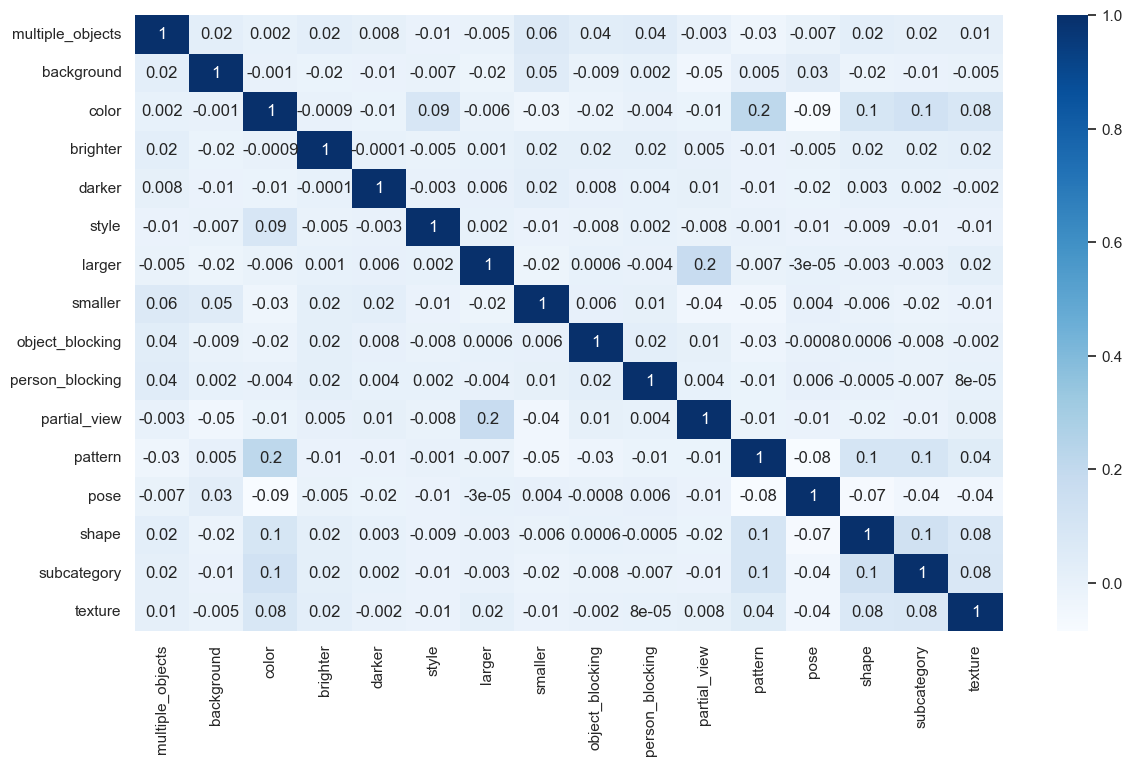

In [13]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = dframe.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

## Getting scores and confidence interval

In [9]:
df1 = pd.read_csv('transformed/scoresCategories.csv',index_col=0)
df2 = pd.read_csv('transformed/scoresFiles.csv',index_col=0)
df3 = pd.read_csv('transformed/scoresPersons.csv',index_col=0)
df4 = pd.read_csv('transformed/allData.csv',index_col=0)

dfTrue = pd.read_csv('df_30img_samples.csv',index_col=0)

In [62]:
df3

,person,accuracy,balacc,f1score,cosine,jaccard,logloss
0,Carl,0.835417,0.692579,0.496815,0.497310,0.330508,5.932185
1,Mads,0.789583,0.592321,0.322148,0.323793,0.192000,7.584185
2,Nicki,0.802083,0.614383,0.362416,0.364267,0.221311,7.133640
3,Joachim,0.797917,0.640918,0.404908,0.404916,0.253846,7.283822
4,Spyros,0.793750,0.619040,0.369427,0.369794,0.226562,7.434004
5,BASELINE,0.829167,0.500000,0.000000,1.000000,0.000000,6.157457
6,Julius,0.854167,0.761981,0.593023,0.593666,0.421488,5.256366
7,Jonas,0.797917,0.674807,0.451977,0.453201,0.291971,7.283822
8,Laurine,0.739583,0.721933,0.476987,0.502364,0.313187,9.386368


In [82]:
df2.groupby('file').mean()

/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_55397/3431567041.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('file').mean()


,Unnamed: 0,accuracy,balacc,f1score,cosine,jaccard,logloss
file,,,,,,,
ILSVRC2012_val_00001470.JPEG,120.0,0.763889,0.555556,0.179894,0.303382,0.129630,8.510307
ILSVRC2012_val_00003768.JPEG,121.0,0.750000,0.547619,0.213580,0.332445,0.134259,9.010913
ILSVRC2012_val_00003808.JPEG,122.0,0.895833,0.750000,0.504233,0.628451,0.433333,3.754547
ILSVRC2012_val_00007306.JPEG,123.0,0.805556,0.623932,0.371605,0.499805,0.235450,7.008488
ILSVRC2012_val_00009634.JPEG,124.0,0.833333,0.690476,0.388889,0.513177,0.268519,6.007276
ILSVRC2012_val_00010411.JPEG,125.0,0.756944,0.608262,0.330159,0.449833,0.206878,8.760610
ILSVRC2012_val_00014415.JPEG,126.0,0.645833,0.578704,0.353524,0.475874,0.231061,12.765461
ILSVRC2012_val_00015178.JPEG,127.0,0.715278,0.597222,0.342593,0.459320,0.231746,10.262429
ILSVRC2012_val_00015410.JPEG,128.0,0.916667,0.785714,0.585185,0.704456,0.500000,3.003638


In [87]:
df3

,Unnamed: 0,person,accuracy,balacc,f1score,cosine,jaccard,logloss
0,0,Carl,0.835417,0.692579,0.496815,0.497310,0.330508,5.932185
1,1,Mads,0.789583,0.592321,0.322148,0.323793,0.192000,7.584185
2,2,Nicki,0.802083,0.614383,0.362416,0.364267,0.221311,7.133640
3,3,Joachim,0.797917,0.640918,0.404908,0.404916,0.253846,7.283822
4,4,Spyros,0.793750,0.619040,0.369427,0.369794,0.226562,7.434004
5,5,BASELINE,0.829167,0.500000,0.000000,1.000000,0.000000,6.157457
6,6,Julius,0.854167,0.761981,0.593023,0.593666,0.421488,5.256366
7,7,Jonas,0.797917,0.674807,0.451977,0.453201,0.291971,7.283822
8,8,Laurine,0.739583,0.721933,0.476987,0.502364,0.313187,9.386368


In [8]:
print('----------------means-----------------')
print(df3.iloc[:,2:18].mean())
print('---------------std------------------')
print(df3.iloc[:,2:18].std())

----------------means-----------------
pose                0.457143
partial_view        0.233333
object_blocking     0.019048
person_blocking     0.104762
multiple_objects    0.185714
smaller             0.238095
larger              0.133333
brighter            0.095238
darker              0.066667
background          0.423810
color               0.261905
shape               0.085714
texture             0.071429
pattern             0.085714
style               0.033333
subcategory         0.123810
dtype: float64
---------------std------------------
pose                0.499350
partial_view        0.423963
object_blocking     0.137019
person_blocking     0.306978
multiple_objects    0.389805
smaller             0.426935
larger              0.340747
brighter            0.294245
darker              0.250040
background          0.495342
color               0.440722
shape               0.280611
texture             0.258155
pattern             0.280611
style               0.179934
subcategor

In [10]:
df1.groupby('person').mean()  #['Carl.csv', 'Mads.csv', 'Nicki.csv', 'Joachim.csv', 'Spyros.csv', 'Julius.csv', 'Jonas.csv']

/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_55397/402750283.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('person').mean()  #['Carl.csv', 'Mads.csv', 'Nicki.csv', 'Joachim.csv', 'Spyros.csv', 'Julius.csv', 'Jonas.csv']


,Unnamed: 0,accuracy,f1score,cosine,jaccard,logloss
person,,,,,,
0,7.5,0.835417,0.259372,0.790637,0.203301,5.932185
1,23.5,0.789583,0.182143,0.718424,0.118613,7.584185
2,39.5,0.802083,0.189743,0.775155,0.143686,7.133640
3,55.5,0.797917,0.166401,0.688881,0.111641,7.283822
4,71.5,0.793750,0.174232,0.695667,0.118105,7.434004
5,87.5,0.854167,0.220651,0.723268,0.188988,5.256366
6,103.5,0.797917,0.199154,0.719310,0.138280,7.283822


In [17]:
val30 = pd.read_csv('df_30img_samples.csv')
val30.brighter

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: brighter, dtype: int64